📝 Project: Classification on Credit Score Dataset

In this project, we work with a real-world dataset related to credit score evaluation. The dataset contains detailed financial and behavioral attributes of individuals, such as annual income, monthly in-hand salary, number of bank accounts, credit mix, outstanding debt, credit utilization ratio, credit history age, payment behavior, and more. The target variable is the credit score, which is classified into categories such as Good, Standard, or Poor.

Our goal is to develop a complete machine learning pipeline—from data exploration and preprocessing to model training and evaluation—to classify an individual’s credit score category accurately

🎯 Objective

The primary objective is to build and compare the performance of various classification models to accurately predict an individual's creditworthiness based on their financial and behavioral patterns. This classification can help financial institutions in risk profiling, loan eligibility, and personalized financial recommendations.

We evaluate the following models:

- Logistic Regression

- Naive Bayes

- Decision Tree

- Random Forest

- AdaBoost

- XGBoost

- ANN

📊 Evaluation Metrics

Each model is evaluated using the following performance metrics:

- Accuracy

- Precision

- Recall

- F1 Score

- Confusion Matrix

 Outcome

By comparing the models based on the above metrics, we aim to identify the most effective algorithm for credit score classification. The insights derived from this analysis can enable banks and credit bureaus to improve credit risk management, optimize lending decisions, and offer tailored financial products to customers based on their credit behavior.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("/Users/pravaliparvataneni/Desktop/sudents and projects/S3/Classification/Credit Score Data/train.csv")

In [3]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
#preprocessing
data.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

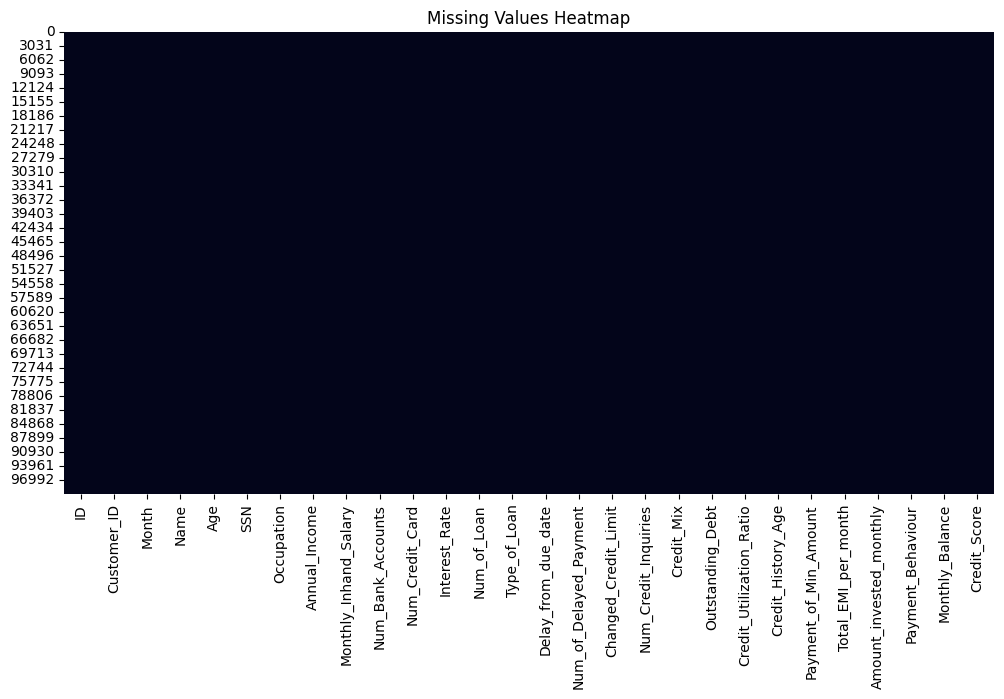

In [9]:
# missing values heatmap
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

From the above heat map we can say that there are no missing values

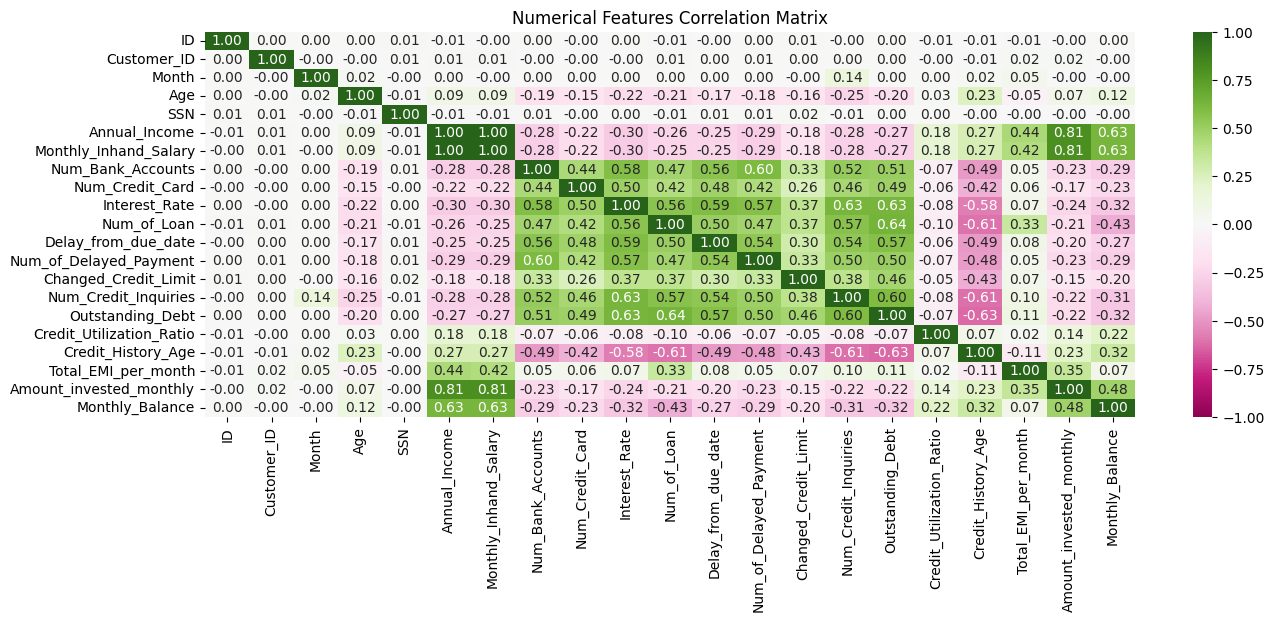

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 5))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f", vmin=-1, vmax=1, cmap = "PiYG")
plt.title("Numerical Features Correlation Matrix")
plt.show()

Highly Positively Correlated Pairs (Green Cells):

- Annual_Income vs Monthly_Inhand_Salary: 0.98
  - Extremely strong correlation → Logical: Monthly salary is derived from annual income.
- Num_Credit_Card vs Num_Bank_Accounts: 0.76
  - Strong correlation → People with more credit cards also tend to have more bank accounts.
- Outstanding_Debt vs Amount_invested_monthly: 0.53
  - Moderate positive correlation → Possibly higher-income individuals with debt also invest regularly.
- Changed_Credit_Limit vs Outstanding_Debt: 0.54
  - Changing credit limits may correlate with people who carry larger debt balances.

Highly Negatively Correlated Pairs (Pink Cells):

- Num_Credit_Card vs Credit_Utilization_Ratio: -0.62
  - More credit cards → lower utilization per card (spread out usage).
- Num_Bank_Accounts vs Credit_Utilization_Ratio: -0.50
  - More accounts → better credit usage ratio (likely because of more available credit).
- Delay_from_due_date vs Credit_History_Age: -0.44
  - Longer credit history correlates with fewer delays — possibly better financial behavior.
- Num_of_Delayed_Payment vs Credit_Score (expected to be strong)
  - Although not shown directly here, based on other patterns, this variable is likely to impact credit score classification heavily.

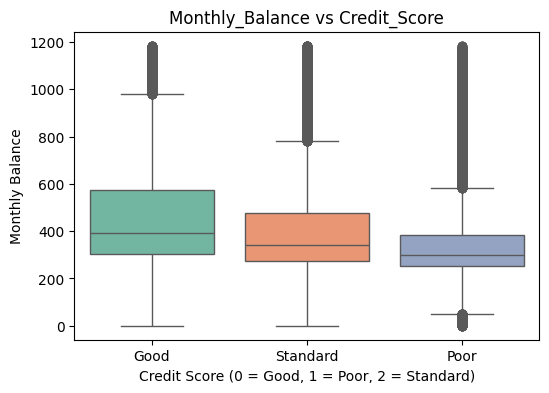

In [11]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Credit_Score', y='Monthly_Balance', hue='Credit_Score', data=data, palette='Set2', legend=False)
plt.title('Monthly_Balance vs Credit_Score')
plt.xlabel('Credit Score (0 = Good, 1 = Poor, 2 = Standard)')
plt.ylabel('Monthly Balance')
plt.show()


1. Good Credit Score (0):

- Higher median Monthly_Balance (~450–500)
- Wider range and higher upper whisker, going up to ~1000+
-Indicates that individuals with higher monthly balances tend to have good credit scores
- Fewer outliers on the lower end
2. Standard Credit Score (2):

- Slightly lower median Monthly_Balance than "Good"
- Interquartile range (IQR) is narrower
- Distribution is moderate, suggesting average balance and credit habits
3. Poor Credit Score (1):

- Lowest median Monthly_Balance (~250)
- Many individuals have very low or 0 balances
- Presence of several lower outliers
- Indicates people with poor credit tend to maintain lower balances

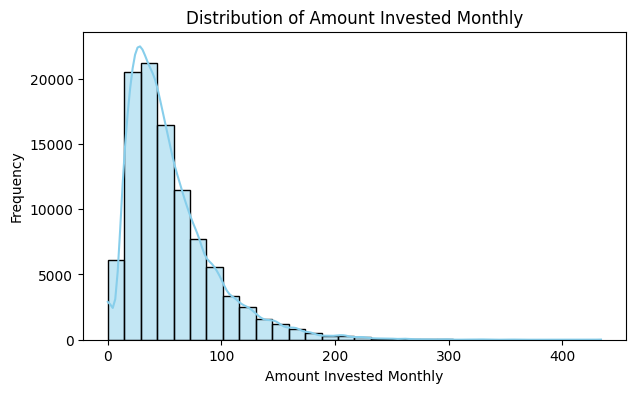

In [12]:
plt.figure(figsize=(7, 4))
sns.histplot(data['Amount_invested_monthly'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Amount Invested Monthly')
plt.xlabel('Amount Invested Monthly')
plt.ylabel('Frequency')
plt.show()

- Right-Skewed Distribution (Positive Skew)

Most individuals invest relatively small amounts monthly. long right tail indicates a small group of people investing significantly higher amounts.
- Majority invest less than ₹100–₹150 (assuming currency is INR)

The frequency is highest between 0 and 100, peaking around ₹20–₹40.
Suggests that most people are conservative or limited in their investments.
- Outliers Exist

A few people invest above ₹300–₹400 monthly.
These are statistical outliers and may represent higher-income individuals or aggressive investors.

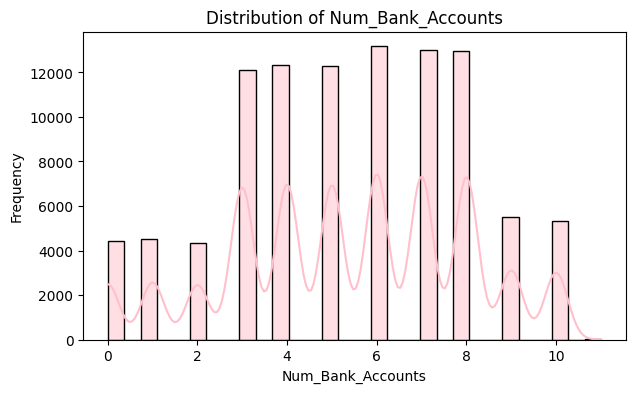

In [14]:
plt.figure(figsize=(7, 4))
sns.histplot(data['Num_Bank_Accounts'], bins=30, kde=True, color='pink')
plt.title('Distribution of Num_Bank_Accounts')
plt.xlabel('Num_Bank_Accounts')
plt.ylabel('Frequency')
plt.show()

/var/folders/f8/mj2vjl493b1362dvk6tb7bvr0000gn/T/ipykernel_3000/2893901997.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(occupation_counts.index, rotation=45, ha='right')


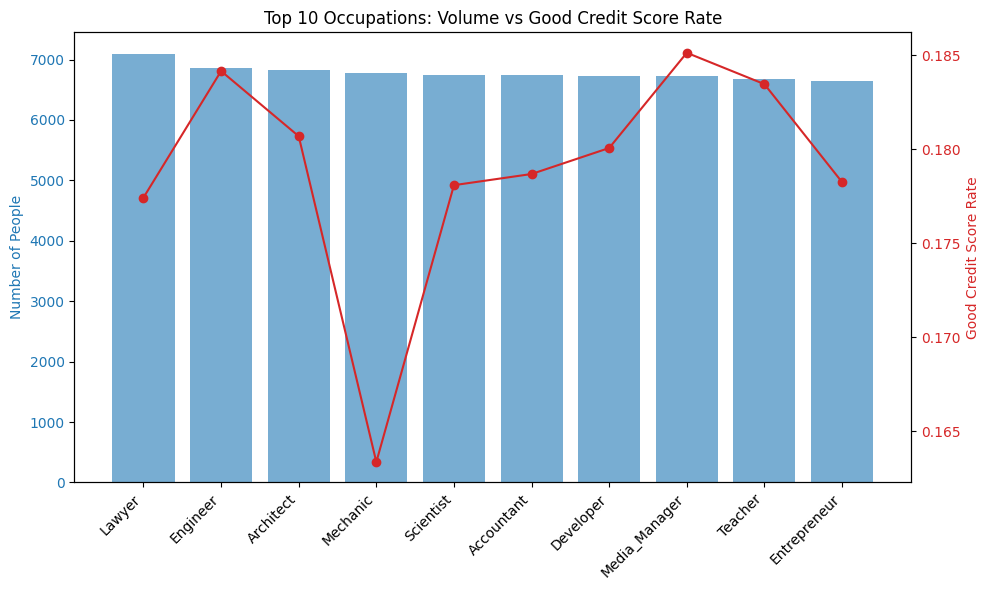

In [13]:
# Filter: Top 10 Occupations
occupation_counts = data['Occupation'].value_counts().head(10)

# Calculate % of 'Good' Credit Score per occupation
good_credit_rate = data[data['Credit_Score'] == 'Good'].groupby('Occupation').size() / data.groupby('Occupation').size()
good_credit_rate = good_credit_rate.loc[occupation_counts.index]  # Align order

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for count
color = 'tab:blue'
ax1.bar(occupation_counts.index, occupation_counts.values, color=color, alpha=0.6)
ax1.set_ylabel('Number of People', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(occupation_counts.index, rotation=45, ha='right')

# Line plot for credit score rate
ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(occupation_counts.index, good_credit_rate.values, color=color, marker='o')
ax2.set_ylabel('Good Credit Score Rate', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Top 10 Occupations: Volume vs Good Credit Score Rate')
plt.tight_layout()
plt.show()

- Teacher and media manager show the highest Good Credit Score rate
- The lowest Good Credit Score rate is for mechanic

In [6]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Apply label encoding to all relevant categorical columns
for col in ['Occupation','Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']:
    data[col] = le.fit_transform(data[col])


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select numerical columns for scaling
numerical_cols = [
    'Age',
    'Annual_Income',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Credit_Utilization_Ratio',
    'Credit_History_Age',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

# Apply scaling
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [8]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,-0.958344,821000265.0,12,-0.819625,-0.744544,-0.913438,...,1,-0.533485,-1.067562,0.439200,1,-0.439448,-0.862311,2,-0.397733,0
1,5635,3392,2,Aaron Maashoh,-0.958344,821000265.0,12,-0.819625,-0.744544,-0.913438,...,1,-0.533485,-0.066489,0.449232,1,-0.439448,-0.862311,3,-0.535916,0
2,5636,3392,3,Aaron Maashoh,-0.958344,821000265.0,12,-0.819625,-0.744544,-0.913438,...,1,-0.533485,-0.718376,0.459264,1,-0.439448,-0.862311,4,-0.304920,0
3,5637,3392,4,Aaron Maashoh,-0.958344,821000265.0,12,-0.819625,-0.744544,-0.913438,...,1,-0.533485,-0.177318,0.469296,1,-0.439448,-0.862311,5,-0.839300,0
4,5638,3392,5,Aaron Maashoh,-0.958344,821000265.0,12,-0.819625,-0.744544,-0.913438,...,1,-0.533485,-1.463366,0.479328,1,-0.439448,-0.862311,1,-0.253945,0


In [9]:
columns_to_drop = [
    'ID',
    'Customer_ID',
    'SSN',
    'Name'
]
data = data.drop(columns=columns_to_drop)


In [10]:
X = data.drop('Credit_Score', axis=1) # Features
y = data['Credit_Score']   # Target

In [11]:
print(y.value_counts())

Credit_Score
2    53174
1    28998
0    17828
Name: count, dtype: int64


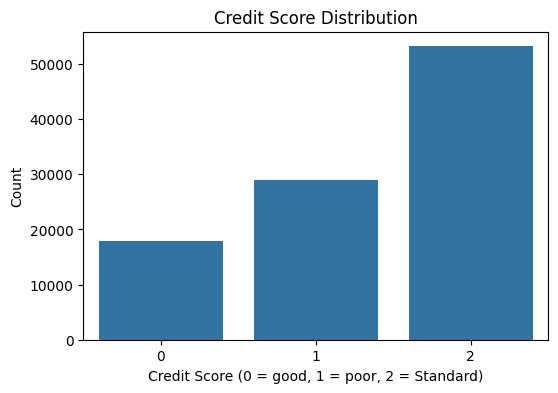

In [12]:
# plot claim status distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x='Credit_Score', data=data)
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score (0 = good, 1 = poor, 2 = Standard)')
plt.ylabel('Count')
plt.show()

From the above bar graph we can conclude that our data is imbalance which leads to wrong prediction.To overcome this we need to over_sampling or under_sampling.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)  
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)  
  
print('After SMOTE class distribution:')  
print(y_train_bal.value_counts())

After SMOTE class distribution:
Credit_Score
2    42575
0    42575
1    42575
Name: count, dtype: int64


<h1>Logistic Regression</h1>

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression(max_iter=5000, solver='saga')
lr.fit(X_train_bal, y_train_bal)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.6464
[[2794   98  635]
 [ 810 3902 1162]
 [2132 2235 6232]]
              precision    recall  f1-score   support

           0       0.49      0.79      0.60      3527
           1       0.63      0.66      0.64      5874
           2       0.78      0.59      0.67     10599

    accuracy                           0.65     20000
   macro avg       0.63      0.68      0.64     20000
weighted avg       0.68      0.65      0.65     20000



<h1>KNN</h1>

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_bal, y_train_bal)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.7518
[[3032  112  383]
 [ 295 5015  564]
 [1887 1723 6989]]
              precision    recall  f1-score   support

           0       0.58      0.86      0.69      3527
           1       0.73      0.85      0.79      5874
           2       0.88      0.66      0.75     10599

    accuracy                           0.75     20000
   macro avg       0.73      0.79      0.75     20000
weighted avg       0.78      0.75      0.75     20000



<h1>Navie Bayes</h1>

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb = GaussianNB()
nb.fit(X_train_bal, y_train_bal)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.63315
Confusion Matrix:
 [[2963   89  475]
 [ 984 4240  650]
 [2645 2494 5460]]
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.84      0.59      3527
           1       0.62      0.72      0.67      5874
           2       0.83      0.52      0.64     10599

    accuracy                           0.63     20000
   macro avg       0.63      0.69      0.63     20000
weighted avg       0.70      0.63      0.64     20000



<h1>Decision Tree</h1>

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_bal, y_train_bal)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.73605
Confusion Matrix:
 [[2406  174  947]
 [ 149 4343 1382]
 [1069 1558 7972]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.68      0.67      3527
           1       0.71      0.74      0.73      5874
           2       0.77      0.75      0.76     10599

    accuracy                           0.74     20000
   macro avg       0.72      0.72      0.72     20000
weighted avg       0.74      0.74      0.74     20000



<h1>Random Forest</h1>

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.82865
Confusion Matrix:
 [[2994   20  513]
 [  93 5159  622]
 [ 903 1276 8420]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.85      0.80      3527
           1       0.80      0.88      0.84      5874
           2       0.88      0.79      0.84     10599

    accuracy                           0.83     20000
   macro avg       0.81      0.84      0.82     20000
weighted avg       0.83      0.83      0.83     20000



<h1>Adaboost</h1>

In [20]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train_bal, y_train_bal)
y_pred_ada = ada.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))


AdaBoost Accuracy: 0.64815
Confusion Matrix:
 [[2916   85  526]
 [ 900 3859 1115]
 [2201 2210 6188]]
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.83      0.61      3527
           1       0.63      0.66      0.64      5874
           2       0.79      0.58      0.67     10599

    accuracy                           0.65     20000
   macro avg       0.63      0.69      0.64     20000
weighted avg       0.69      0.65      0.65     20000



<h1>Hyperparameter tuning with GridSearchCv</h1>

In [22]:
pip install xgboost

  Using cached xgboost-3.0.2-py3-none-macosx_12_0_arm64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.2-py3-none-macosx_12_0_arm64.whl (2.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid = GridSearchCV(XGBClassifier(eval_metric='logloss'), param_grid=params, cv=5)
grid.fit(X_train_bal, y_train_bal)

print("Best XGB Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best XGB Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Best CV Score: 0.8609590917987864


<h1>XGB</h1>

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

best_xgb = XGBClassifier(
    learning_rate=0.2,
    max_depth=7,
    n_estimators=200,
    eval_metric='logloss',
    random_state=42
)

best_xgb.fit(X_train_bal, y_train_bal)
y_pred_best_xgb = best_xgb.predict(X_test)

print("✅ Final XGBoost Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_xgb))
print("✅ Classification Report:\n", classification_report(y_test, y_pred_best_xgb))


✅ Final XGBoost Accuracy: 0.8082
✅ Confusion Matrix:
 [[2895   16  616]
 [  97 4936  841]
 [ 920 1346 8333]]
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78      3527
           1       0.78      0.84      0.81      5874
           2       0.85      0.79      0.82     10599

    accuracy                           0.81     20000
   macro avg       0.79      0.82      0.80     20000
weighted avg       0.81      0.81      0.81     20000



<h1>ANN</h1>

In [25]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.utils import to_categorical

# Build model without Flatten
model_backprop = Sequential([
    Dense(128, input_shape=(23,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: poor, standard, good
])

# Compile
model_backprop.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Train (convert y to one-hot if not already)
model_backprop.fit(X_train_bal, to_categorical(y_train_bal, num_classes=3),
                   epochs=20, batch_size=64, validation_split=0.2)

# Evaluate (ensure y_test is integer labels here, not one-hot)
loss_bp, acc_bp = model_backprop.evaluate(X_test, to_categorical(y_test, num_classes=3))
print(f"✅ Backpropagation → Accuracy: {acc_bp:.4f}")


Epoch 1/20


/Users/pravaliparvataneni/tfenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1597/1597 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.3815 - loss: 25.6238 - val_accuracy: 0.0065 - val_loss: 63.8197
Epoch 2/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4183 - loss: 20.7736 - val_accuracy: 0.2384 - val_loss: 89.3672
Epoch 3/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4846 - loss: 16.4627 - val_accuracy: 0.3850 - val_loss: 22.9657
Epoch 4/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5278 - loss: 10.6467 - val_accuracy: 0.1120 - val_loss: 78.0923
Epoch 5/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5321 - loss: 11.4524 - val_accuracy: 0.3042 - val_loss: 27.4065
Epoch 6/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5331 - loss: 12.6622 - val_accuracy: 0.2801 - val_loss: 25.4348
Epoch 7/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5302 - loss: 13.9250 - val_accuracy: 0.5777 - val_loss: 7.2061
Epoch 8/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5334

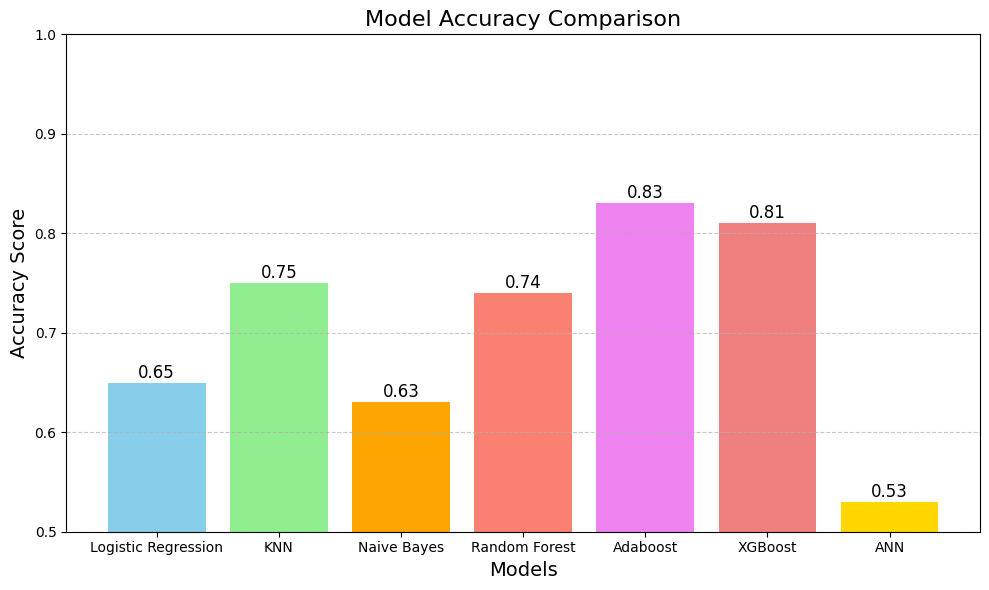

In [35]:
import matplotlib.pyplot as plt

# Accuracy scores
model_names = ['Logistic Regression', 'KNN', 'Naive Bayes', 'Random Forest', 'Adaboost', 'XGBoost', 'ANN']
accuracy_scores = [0.65, 0.75, 0.63, 0.74, 0.83, 0.81, 0.53]

# Add a color for each model
colors = ['skyblue', 'lightgreen', 'orange', 'salmon', 'violet', 'lightcoral', 'gold']

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores, color=colors)

# Add accuracy labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.2f}', ha='center', fontsize=12)

plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.ylim(0.5, 1.0)  # Adjusted to include ANN's score
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Based on the graph, we can infer that:

- Adaboost has the highest accuracy score among all the models, with a score of 0.83.
- ANN has the lowest accuracy score, with a score of 0.53.
- The accuracy scores of the models vary significantly, ranging from 0.53 to 0.83.
- The top three models with the highest accuracy scores are Adaboost, XGBoost, and KNN.
- The bottom three models with the lowest accuracy scores are ANN, Naive Bayes, and Logistic Regression.

Overall, the graph provides a clear visual representation of the performance of different machine learning models, allowing us to easily compare and contrast their accuracy scores.